In [86]:
import csv
import glob
import os
import math
import matplotlib.pyplot as plt
import scipy.signal as signal
from astropy.timeseries import LombScargle
import numpy as np
%matplotlib inline

In [87]:
def read_file_data(filepath):
    '''
    Read data in [[val,time],[val, time]] format
    '''

    raw_data = None
    data = list()

    # Get raw data
    with open(filepath, 'r') as dest_f:
        data_iter = csv.reader(dest_f,delimiter="\t")
        raw_data = [raw_data for raw_data in data_iter]

    # Filter data with not-valid values or empty values
    for raw_val in raw_data:
        try:
            amp = float(raw_val[0])
            time = float(raw_val[1])
            data.append([amp, time])
        except:
            pass
        finally:
            pass

    return data

In [88]:
def save_to_ascii_file(data_list, out_filepath, header=[]):
    '''
    Save data in format [[],[]] into DAT file 
    - CSV 
    - with \t delimeter 
    - \n line endings
    '''
    write_list = []
    print("out_filepath=",out_filepath)
    for data in data_list:
        output_str = ""
        for val in data:
            output_str += str(val) + "\t"
        output_str = output_str[:-1]
        output_str += "\n"
        write_list.append(output_str)

    with open(out_filepath,"w") as f:
        f.writelines(write_list)

In [89]:
def plot_graph(data, out_filepath, lb_freq_start=0.01, lb_freq_end=4.0, lb_freq_num=1000, to_display=False, save_to_disk=True):
    '''
    Plot grapth and return its data

    Params
    data - input data in list of lists with pair value and time
    out_filepath - out file name path for create
    lb_freq_start - start frequency of lombscargle graph
    lb_freq_end - end frequency of lombscargle graph
    lb_freq_num - number of points in lombscargle graph
    to_display - if set to true then graph will be shown on the display
    save_to_disk - if set to true then graph will be saved on the disk

    Return
    List of lists of graph values in form [freq, pgram_value]
    '''

    output_data = list()

    x = list()
    y = list()

    for val_pair in data:
        x.append(val_pair[1])
        y.append(val_pair[0])

    # Define the array of frequencies for which to compute the periodogram:
    f = np.linspace(lb_freq_start, lb_freq_end, lb_freq_num)

    #Calculate Lomb-Scargle periodogram:
   
    # define xar & yar
    xar=np.asarray(x)
    yar=np.asarray(y)
    frequency, power = LombScargle(xar,yar).autopower()
    # pgram = signal.lombscargle(xar, yar-np.mean(yar), f,normalize=True)

    # Create figure with 2 subplots
    fig = plt.figure()
    source_ax = fig.add_subplot(211)
    pgram_ax = fig.add_subplot(212)

    #Now make a plot of the input data:
    
    #source_ax.plot(x, y, 'b+')
    source_ax.plot(xar, yar, 'b+')

    #Then plot the normalized periodogram:
    #pgram_ax.plot(f, pgram)
    pgram_ax.plot(2.*np.pi*frequency[:600], power[:600],'--g')
    if to_display:
        plt.show()

    if save_to_disk:
        plt.savefig(out_filepath)

    # Generate output
    for idx, freq in enumerate(frequency):
        output_data.append([2.*np.pi*freq, power[idx]])

    return output_data

In [90]:
def main():
    print("Script is started")

    files = glob.glob("./input/*.dat")    

    for filepath in files:
        print("Process >> " + filepath)

        try:
            read_data = read_file_data(filepath)
            out_dat_filepath = "./output/" + "astro_"+os.path.basename(filepath) + ".dat"
            out_png_filepath = "./output/" + "astro_"+os.path.basename(filepath) + ".png"
            
            print(read_data[0][1],read_data[1][1],read_data[len(read_data)-1])
            dt=read_data[1][1]-read_data[0][1]
            lb_freq_end=math.pi/dt
            lb_freq_start=2.0*math.pi/(read_data[len(read_data)-1][1])
            
            period_min=2.*dt
            period_max=read_data[len(read_data)-1][1]
            lb_freq_num=int(period_max/dt)
            
            output_data = plot_graph(read_data, 
                                    out_png_filepath,
                                    lb_freq_start,
                                    lb_freq_end,
                                    lb_freq_num)

            print("Saved PNG to >> " + out_png_filepath)

            save_to_ascii_file(output_data, out_dat_filepath)
            print("Saved DAT to >> " + out_dat_filepath)
    
        except Exception as e:
            print("Cannot process >> ", filepath)
            print("Reason >> " + str(e))
            
        finally:
            print()
    print("Script is finished")

Script is started
Process >> ./input\2017-18.dat
0.0 0.042 [2.08, 120.792]
Saved PNG to >> ./output/astro_2017-18.dat.png
out_filepath= ./output/astro_2017-18.dat.dat
Saved DAT to >> ./output/astro_2017-18.dat.dat

Script is finished


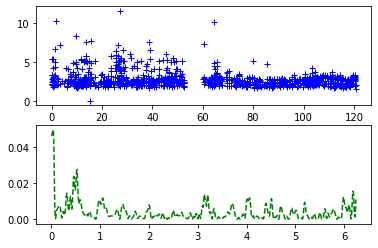

In [91]:
if __name__ == "__main__":
    main()